<a href="https://colab.research.google.com/github/ZIZOUTOUMOU/ZIZOUTOUMOU/blob/main/cal_paralle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
pip install mpi4py

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 25.0 MB/s eta 0:00:00


In [7]:
pip install mpi


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 kB 5.0 MB/s eta 0:00:00


In [1]:
import numpy as np
import time

N = 80  # fixed size

def matmul_sequential(A, B):
    C = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            s = 0
            for k in range(N):
                s += A[i, k] * B[k, j]
            C[i, j] = s
    return C

if __name__ == "__main__":
    # generate random matrices once
    A = np.random.rand(N, N)
    B = np.random.rand(N, N)

    times = []

    for run in range(10):
        t0 = time.time()
        C = matmul_sequential(A, B)
        t1 = time.time()

        elapsed = t1 - t0
        times.append(elapsed)

        print(f"Run {run+1}: {elapsed:.4f} seconds")

    mean_time = sum(times) / len(times)
    print("\nMean time =", mean_time)



Run 1: 0.2552 seconds
Run 2: 0.3851 seconds
Run 3: 0.2197 seconds
Run 4: 0.3968 seconds
Run 5: 0.2023 seconds
Run 6: 0.4035 seconds
Run 7: 0.5525 seconds
Run 8: 1.1939 seconds
Run 9: 1.1143 seconds
Run 10: 0.5641 seconds

Mean time = 0.5287521600723266


In [2]:
import numpy as np
import threading
import time

N = 80  # fixed size

def worker(A, B, C, start, end):
    for i in range(start, end):
        for j in range(N):
            C[i, j] = np.dot(A[i, :], B[:, j])

def matmul_threaded(A, B, nthreads):
    C = np.zeros((N, N))
    threads = []

    chunk = N // nthreads

    for t in range(nthreads):
        s = t * chunk
        e = N if t == nthreads - 1 else (t + 1) * chunk
        thr = threading.Thread(target=worker, args=(A, B, C, s, e))
        threads.append(thr)
        thr.start()

    for thr in threads:
        thr.join()

    return C


if __name__ == "__main__":
    threads = int(input("Number of threads: "))

    A = np.random.rand(N, N)
    B = np.random.rand(N, N)

    times = []

    for run in range(10):
        t0 = time.time()
        C = matmul_threaded(A, B, threads)
        elapsed = time.time() - t0
        times.append(elapsed)

        print(f"Run {run+1}: {elapsed:.4f} seconds")

    mean_time = sum(times) / len(times)
    print("\nMean time =", mean_time)


Number of threads: 2
Run 1: 0.0219 seconds
Run 2: 0.0184 seconds
Run 3: 0.0180 seconds
Run 4: 0.0176 seconds
Run 5: 0.0170 seconds
Run 6: 0.0170 seconds
Run 7: 0.0172 seconds
Run 8: 0.0185 seconds
Run 9: 0.0229 seconds
Run 10: 0.0309 seconds

Mean time = 0.019944143295288087


Number of threads: 3
Run 1: 4.6732 seconds
Run 2: 2.8732 seconds
Run 3: 4.2807 seconds
Run 4: 4.8960 seconds
Run 5: 2.8085 seconds
Run 6: 4.7871 seconds
Run 7: 4.6342 seconds
Run 8: 2.8011 seconds
Run 9: 4.7227 seconds
Run 10: 4.7757 seconds

Mean time = 4.12524983882904


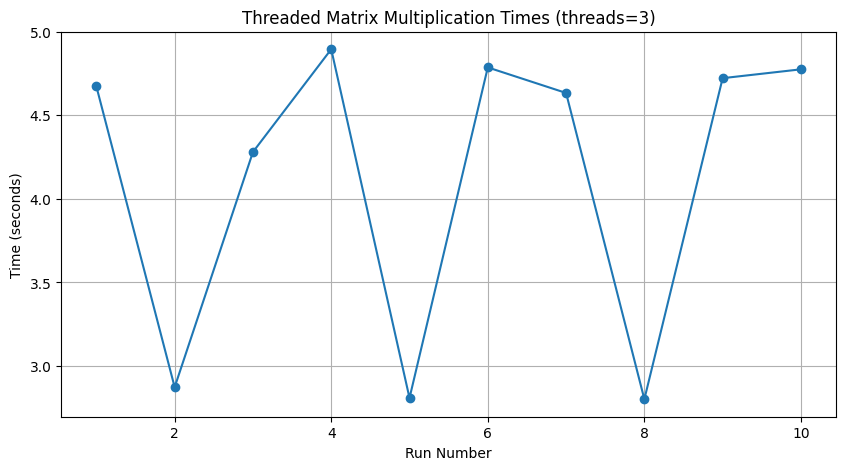

In [3]:
import numpy as np
import threading
import time
import matplotlib.pyplot as plt

N = 800  # fixed size

def worker(A, B, C, start, end):
    for i in range(start, end):
        for j in range(N):
            C[i, j] = np.dot(A[i, :], B[:, j])

def matmul_threaded(A, B, nthreads):
    C = np.zeros((N, N))
    threads = []

    chunk = N // nthreads

    for t in range(nthreads):
        s = t * chunk
        e = N if t == nthreads - 1 else (t + 1) * chunk
        thr = threading.Thread(target=worker, args=(A, B, C, s, e))
        threads.append(thr)
        thr.start()

    for thr in threads:
        thr.join()

    return C


if __name__ == "__main__":
    threads = int(input("Number of threads: "))

    A = np.random.rand(N, N)
    B = np.random.rand(N, N)

    times = []

    for run in range(10):
        t0 = time.time()
        C = matmul_threaded(A, B, threads)
        elapsed = time.time() - t0
        times.append(elapsed)

        print(f"Run {run+1}: {elapsed:.4f} seconds")

    mean_time = sum(times) / len(times)
    print("\nMean time =", mean_time)

    # ----------------------------
    # Plot
    # ----------------------------
    plt.figure(figsize=(10,5))
    plt.plot(range(1, 11), times, marker='o')
    plt.title(f"Threaded Matrix Multiplication Times (threads={threads})")
    plt.xlabel("Run Number")
    plt.ylabel("Time (seconds)")
    plt.grid(True)
    plt.show()


Run 1: 0.0466 seconds
Run 2: 0.0445 seconds
Run 3: 0.0443 seconds
Run 4: 0.0424 seconds
Run 5: 0.0425 seconds
Run 6: 0.0473 seconds
Run 7: 0.0418 seconds
Run 8: 0.0423 seconds
Run 9: 0.0438 seconds
Run 10: 0.0419 seconds

Mean MPI time = 0.0437413215637207


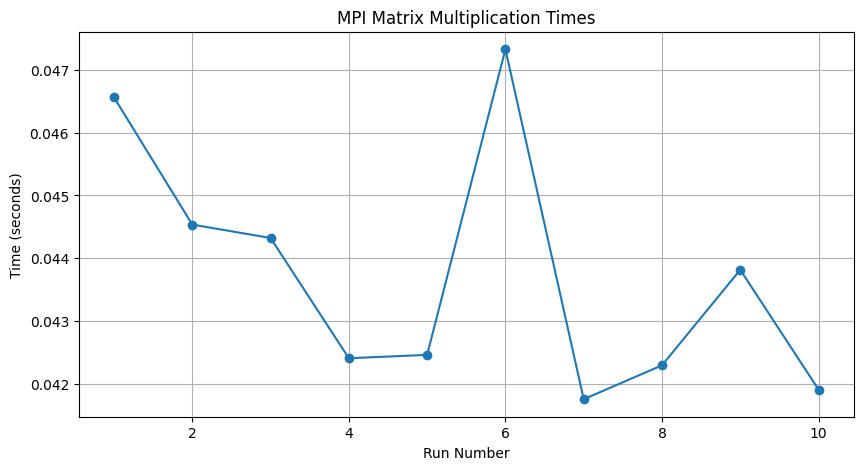

In [8]:
import numpy as np
from mpi4py import MPI
import time
import matplotlib.pyplot as plt

N = 800  # fixed

def matmul_mpi():
    comm = MPI.COMM_WORLD
    rank = comm.Get_rank()
    size = comm.Get_size()

    if rank == 0:
        A = np.random.rand(N, N)
        B = np.random.rand(N, N)
    else:
        A = None
        B = np.empty((N, N))

    # Broadcast B to all processes
    comm.Bcast(B, root=0)

    rows = N // size
    start = rank * rows
    end = N if rank == size - 1 else (rank + 1) * rows

    A_local = np.zeros((end - start, N))

    # Scatter A manually
    if rank == 0:
        for p in range(size):
            s = p * rows
            e = N if p == size - 1 else (p + 1) * rows
            if p == 0:
                A_local[:] = A[s:e, :]
            else:
                comm.Send(A[s:e, :], dest=p)
    else:
        comm.Recv(A_local, source=0)

    # Local computation
    C_local = A_local @ B

    # Gather C back to root
    if rank == 0:
        C = np.zeros((N, N))
        C[start:end, :] = C_local
        for p in range(1, size):
            s = p * rows
            e = N if p == size - 1 else (p + 1) * rows
            comm.Recv(C[s:e, :], source=p)
        return C
    else:
        comm.Send(C_local, dest=0)
        return None


if __name__ == "__main__":
    comm = MPI.COMM_WORLD
    rank = comm.Get_rank()

    times = []

    for run in range(10):
        comm.Barrier()
        t0 = time.time()

        C = matmul_mpi()

        comm.Barrier()
        elapsed = time.time() - t0

        if rank == 0:
            times.append(elapsed)
            print(f"Run {run+1}: {elapsed:.4f} seconds")

    if rank == 0:
        mean_time = sum(times) / len(times)
        print("\nMean MPI time =", mean_time)

        # ----------------------------
        # Plot (only rank 0)
        # ----------------------------
        plt.figure(figsize=(10, 5))
        plt.plot(range(1, 11), times, marker='o')
        plt.title("MPI Matrix Multiplication Times")
        plt.xlabel("Run Number")
        plt.ylabel("Time (seconds)")
        plt.grid(True)
        plt.show()


In [4]:
pip install cupy-cuda12x

Run 1: 2.054070 seconds
Run 2: 0.030790 seconds
Run 3: 0.035096 seconds
Run 4: 0.042536 seconds
Run 5: 0.032076 seconds
Run 6: 0.027543 seconds
Run 7: 0.021278 seconds
Run 8: 0.019135 seconds
Run 9: 0.030189 seconds
Run 10: 0.021351 seconds

Mean GPU time = 0.23140642642974854


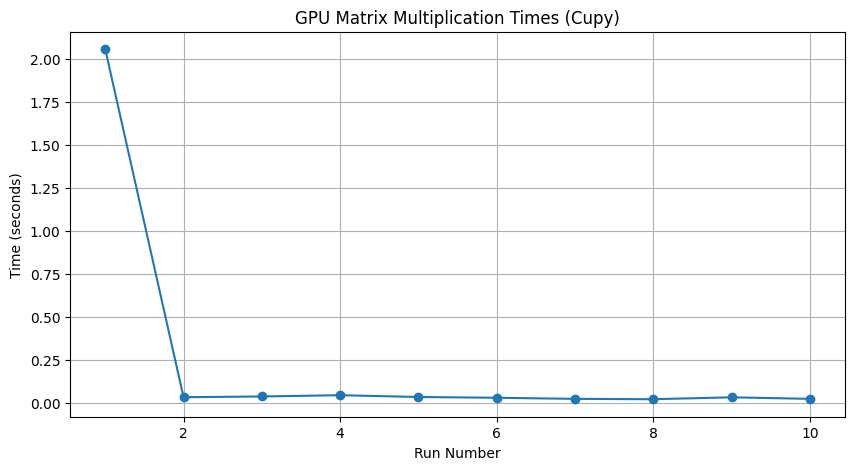

In [5]:
import numpy as np
import time
import matplotlib.pyplot as plt

N = 800

def matmul_gpu(A, B):
    import cupy as cp
    A_gpu = cp.asarray(A)
    B_gpu = cp.asarray(B)
    C_gpu = A_gpu @ B_gpu
    return cp.asnumpy(C_gpu)

if __name__ == "__main__":
    A = np.random.rand(N, N)
    B = np.random.rand(N, N)

    times = []

    for run in range(10):
        t0 = time.time()
        C = matmul_gpu(A, B)
        elapsed = time.time() - t0
        times.append(elapsed)

        print(f"Run {run+1}: {elapsed:.6f} seconds")

    mean_time = sum(times) / len(times)
    print("\nMean GPU time =", mean_time)

  #      Plot

    plt.figure(figsize=(10, 5))
    plt.plot(range(1, 10 + 1), times, marker='o')
    plt.title("GPU Matrix Multiplication Times (Cupy)")
    plt.xlabel("Run Number")
    plt.ylabel("Time (seconds)")
    plt.grid(True)
    plt.show()

